In [ ]:
import random
import math
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import partial
import statistics


In [ ]:
def rw2(n):# this gives samples from weibull(2,5)
    x,y=0,0
    distance=[]
    for i in range(1,n+1):
            r=random.weibullvariate(alpha,beta) # step size r
            theta=2.*math.pi*random.random()
            x +=r*math.cos(theta)
            y +=r*math.sin(theta)
            distance.append(r)# save the distances r for the mcmc sampler
    return(np.array(distance))# depending what do you want to do, either save the pairs, or save the distances r  between points
    #return(x,y)
    
alpha=int(input("what's the scale?"))
beta=int(input("what's the shape?"))
n=int(input("how many steps?"))
#tries=int(input("how many tries?"))#  put tries=1  in order to properly save the list distance
data = rw2(n)# very important because you need the same data, if you put rw2(n) in there you change the data every time
for i in range(tries):
    print (rw2(n))

In [ ]:
# calculate the log likelihood of weibull(a,b)
import scipy.stats 
from scipy.stats import dweibull
def log_likelihood(x,a,b):
     return sum(dweibull.logpdf(x,scale=b,c=a))
    

In [ ]:

import scipy.stats as stats
import numpy as np
n=100 #number of observations in a sample 
# initial guess for theta(a and b) as array.
guess = [5.0,2.0]
# Prepare storing MCMC chain as array of arrays.
A = [guess]
# define stepsize of MCMC.
stepsizes = [0.1,0.1]  # array of stepsizes
accepted  = 0.0
old_theta=guess# define initial values for theta 
old_loglik = log_likelihood(data,old_theta[0],old_theta[1])#calculate the first log likelihood
# Metropolis-Hastings with 10,000 iterations.
for p in range(10000):
    #old_theta  = A[len(A)-1]   old parameter value as array(not that elegant way)
    # Suggest new candidate from Gaussian proposal distribution.
    #new_theta = np.zeros([len(old_theta)])
    new_theta = old_theta + stats.norm(0, stepsizes).rvs() 
    #add the restraints on new_theta
    if new_theta[0]<0 or new_theta[1]<0: 
        continue
    new_loglik = log_likelihood(data,new_theta[0],new_theta[1])
    # Accept new candidate in Monte-Carlo fashing.
    if (new_loglik > old_loglik):
        A.append(new_theta)
        accepted = accepted + 1.0  # monitor acceptance
        old_loglik=new_loglik
        old_theta=new_theta
    else:
        u = random.uniform(0.0,1.0)
        if (u < math.exp(new_loglik - old_loglik)):
            A.append(new_theta)
            accepted = accepted + 1.0  # monitor acceptance
            old_loglik=new_loglik
            old_theta=new_theta
        #else:
            #A.append(old_alpha)(I guess this is not good)
print("Acceptance rate = "+str(accepted/10000.0))
#print(A)



In [ ]:
old_theta=guess# define initial values for theta 
old_loglik = log_likelihood(rw2(n),old_theta[0],old_theta[1])#calculate the first log likelihood

In [ ]:
new_theta = np.zeros([len(old_theta)])
new_theta

In [ ]:
# I believe the two methods are the same
import scipy.stats as stats
old_theta=[2,5]
stepsizes=[0.005,0.005]
new_theta=np.zeros(2)
new_theta[0] = random.gauss(old_theta[0], stepsizes[0])
new_theta[1] = random.gauss(old_theta[1], stepsizes[1])
print(new_theta)
#?random.gauss
sigma=0.3
theta_p = old_theta + stats.norm(0, sigma).rvs() 
print(theta_p)
stats.norm(0, sigma).rvs() 
#?stats.norm
#newest_theta=random.gauss(old_theta,stepsizes)doesn't work
#newest_theta
newest_theta=stats.norm(old_theta,sigma).rvs()
print(newest_theta)

In [57]:
# save the posterior for a
a=[]
for i in range(len(A)-1):
    a.append(A[i-1][0])
#print(a,end='')   
statistics.mean(a)   

5.2415530681153939

In [58]:
# save the posterior for b
b=[]
for i in range(len(A)-1):
    b.append(A[i-1][1])
#print(b,end='') 
statistics.mean(b)

2.0002612099419284

In [ ]:
okay_theta = old_theta + stats.norm(0, stepsizes).rvs() 
okay_theta

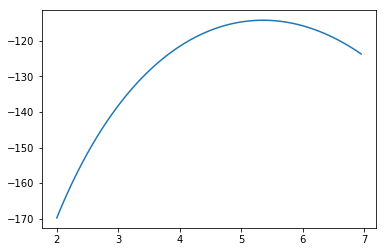

In [10]:

loglike = np.zeros(100)
xval = np.zeros(100)

for i in range(100):
    xval[i]=2+i*0.05
    loglike[i] = log_likelihood(data,2+i*0.05,2)

plt.plot(xval,loglike)



In [13]:
import matplotlib.pyplot as plt


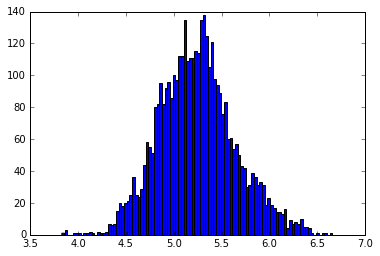

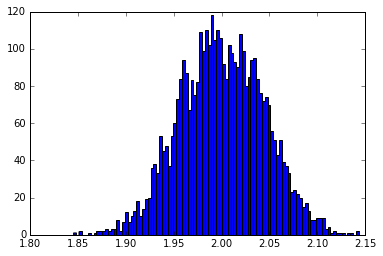

In [60]:
B=np.array(A)
plt.hist(B[:,0],bins=100)

plt.show()
plt.hist(B[:,1],bins=100)
plt.show()

In [34]:
stats.norm(0, stepsizes).rvs() 

array([-0.00718321, -0.01077469])